<a href="https://colab.research.google.com/github/88ymatsu/tutorial/blob/master/cnn_modal_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


IndexError: ignored

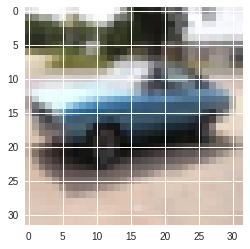

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net_modal(nn.Module):
    def __init__(self):
        super(Net_modal, self).__init__()
        conv1layer = [nn.Conv2d(3, 6, 5) for _ in range(10)]
        self.conv1layer = nn.ModuleList(conv1layer)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x, i):
        x = self.pool(F.relu(self.conv1layer[i](x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net_modal()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 第二引数は，スタート位置で，0なのでenumerate(trainloader)と同じ
        # https://docs.python.org/3/library/functions.html#enumerate

        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.731
[1,  4000] loss: 0.421
[1,  6000] loss: 0.286
[1,  8000] loss: 0.390
[1, 10000] loss: 0.056
[1, 12000] loss: 0.214
[1, 14000] loss: 0.093
[1, 16000] loss: 0.059
[1, 18000] loss: 0.020
[1, 20000] loss: 0.223
[1, 22000] loss: 0.020
[1, 24000] loss: 0.074
[1, 26000] loss: 0.011
[1, 28000] loss: 0.003
[1, 30000] loss: 0.003
[1, 32000] loss: 0.003
[1, 34000] loss: 0.002
[1, 36000] loss: 0.002
[1, 38000] loss: 0.003
[1, 40000] loss: 0.001
[1, 42000] loss: 0.000
[1, 44000] loss: 0.001
[1, 46000] loss: 0.000
[1, 48000] loss: 0.000
[1, 50000] loss: 0.001
[2,  2000] loss: 0.000
[2,  4000] loss: 0.002
[2,  6000] loss: 0.002
[2,  8000] loss: 0.000
[2, 10000] loss: 0.002
[2, 12000] loss: 0.000
[2, 14000] loss: 0.000
[2, 16000] loss: 0.000
[2, 18000] loss: 0.003
[2, 20000] loss: 0.403
[2, 22000] loss: 0.277
[2, 24000] loss: 0.087
[2, 26000] loss: 0.141
[2, 28000] loss: 0.011
[2, 30000] loss: 0.007
[2, 32000] loss: 0.005
[2, 34000] loss: 0.007
[2, 36000] loss: 0.001
[2, 38000] 

In [15]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images), labels)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 89 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    #print("images type : ", type(images))
    #print("images.shape : ", images.shape)
    outputs = net(Variable(images), labels)
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s, %2d, %2d' % (
        classes[i],  class_correct[i], class_total[i]))

In [0]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)